# Pandas: This is used for data manipulation and analysis. It provides data structures like DataFrame, which will help you load and preprocess the dataset.


In [94]:
import pandas as pd


# Numpy: This is essential for numerical operations, especially if you need to work with matrices, arrays, and perform mathematical functions.


In [96]:
import numpy as np


# Matplotlib/Seaborn: These are popular libraries for data visualization. You can use these to create plots and graphs for EDA (Exploratory Data Analysis).



In [98]:
import matplotlib.pyplot as plt
import seaborn as sns


# Scikit-learn: This is the primary library for machine learning in Python. You will use it to build models, such as DecisionTreeRegressor and LinearRegression. It also provides tools for splitting datasets, scaling data, and evaluating models.



In [100]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression


# Statsmodels: For statistical modeling, this can help you with linear regression, hypothesis testing, and other statistics-related tasks.



In [102]:
import statsmodels.api as sm


# 2. Exploratory Data Analysis (EDA)

# Load the Dataset:

In [104]:
df = pd.read_csv('kc_house_data.csv') 


# Inspect the Data:

In [106]:
# Inspect first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())


           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

# Visualize the Data:

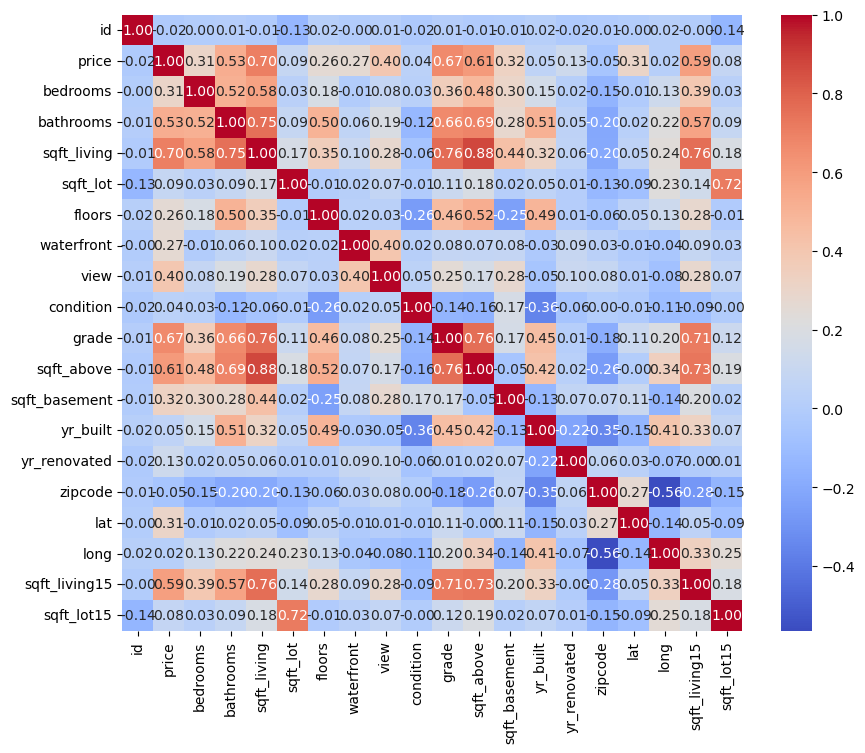

In [108]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Visualize the correlation matrix for numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


# 3. Feature Selection and Preprocessing

# Handle Missing Data:

In [109]:
# Only select numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Fill missing values with the mean of each numeric column
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Check if there are any remaining missing values
print(df.isna().sum())

# Optionally, print the first few rows to verify the changes
print(df.head())


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  

# Encode Categorical Data: If the dataset contains categorical variables (such as zipcode or condition), you may need to encode them numerically:


In [110]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Select only numeric columns for scaling
numeric_columns = df.select_dtypes(include=['number']).columns

# Apply scaling only on the numeric columns
df_scaled = df.copy()  # Make a copy of the DataFrame to keep non-numeric columns intact
df_scaled[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Check the result
print(df_scaled.head())


         id             date     price  bedrooms  bathrooms  sqft_living  \
0  0.886146  20141013T000000 -0.866717 -0.398737  -1.447464    -0.979835   
1  0.637511  20141209T000000 -0.005688 -0.398737   0.175607     0.533634   
2  0.365444  20150225T000000 -0.980849 -1.473959  -1.447464    -1.426254   
3 -0.727656  20141209T000000  0.174090  0.676485   1.149449    -0.130550   
4 -0.912881  20150218T000000 -0.081958 -0.398737  -0.149007    -0.435422   

   sqft_lot    floors  waterfront      view  ...     grade  sqft_above  \
0 -0.228321 -0.915427   -0.087173 -0.305759  ... -0.558836   -0.734708   
1 -0.189885  0.936506   -0.087173 -0.305759  ... -0.558836    0.460841   
2 -0.123298 -0.915427   -0.087173 -0.305759  ... -1.409587   -1.229834   
3 -0.244014 -0.915427   -0.087173 -0.305759  ... -0.558836   -0.891699   
4 -0.169653 -0.915427   -0.087173 -0.305759  ...  0.291916   -0.130895   

   sqft_basement  yr_built  yr_renovated   zipcode       lat      long  \
0      -0.658681 -0.5448

# Feature Scaling: Some machine learning algorithms require features to be scaled (e.g., normalization or standardization).




In [120]:
from sklearn.model_selection import train_test_split

# Splitting the data
X = df.drop('price', axis=1)  # Features
y = df['price']  # Target variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the split datasets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

# Optionally, inspect the first few rows of the datasets
print("First 5 rows of X_train:")
print(X_train.head())

print("First 5 rows of y_train:")
print(y_train.head())


Training data shape: (17290, 20)
Testing data shape: (4323, 20)
Training target shape: (17290,)
Testing target shape: (4323,)
First 5 rows of X_train:
               id             date  bedrooms  bathrooms  sqft_living  \
6325   5467910190  20140527T000000         3       1.75         1780   
13473  9331800580  20150310T000000         2       1.00         1000   
17614  2407000405  20150226T000000         3       1.00         1080   
16970  5466700290  20150108T000000         3       2.25         2090   
20868  3026059361  20150417T000000         2       2.50         1741   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
6325      13095     1.0           0     0          4      9        1780   
13473      3700     1.0           0     0          3      6         800   
17614      7486     1.5           0     0          3      6         990   
16970      7500     1.0           0     0          4      7        1280   
20868      1439     2.0           0     0

# 4. Model Building
## You will build two different models for house price prediction: Decision Tree Regressor and Linear Regression.

# Split the Data:
## First, split the dataset into training and testing sets.

In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

# Example code to convert dates and categorical columns to numeric

# Convert date columns (example column 'date_column' to number of days)
if 'date_column' in df.columns:
    df['date_column'] = pd.to_datetime(df['date_column']).astype(int) / 10**9  # Convert to timestamp

# Convert categorical variables using pd.get_dummies or LabelEncoder
df = pd.get_dummies(df, drop_first=True)  # One-hot encoding for categorical columns

# Separate features and target variable
X = df.drop('price', axis=1)  # Features
y = df['price']  # Target variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree model
dt_model = DecisionTreeRegressor()

# Train the model
dt_model.fit(X_train, y_train)

# Predict house prices
y_pred_dt = dt_model.predict(X_test)

# Print results (for example)
print("Predictions:", y_pred_dt[:5])  # Display the first 5 predictions


Predictions: [ 435000.  690000.  942500. 1360000.  715000.]


# # Model 1: Decision Tree Regressor

In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame

# Step 1: Convert any date columns to numeric values
# Example: 'date_column' is the column containing date strings
if 'date_column' in df.columns:
    df['date_column'] = pd.to_datetime(df['date_column'], format='%Y%m%dT%H%M%S')  # Adjust format as needed
    df['date_column'] = df['date_column'].astype(int) / 10**9  # Convert to Unix timestamp (seconds)

# Step 2: Convert categorical variables (if any) to numeric
df = pd.get_dummies(df, drop_first=True)  # One-hot encoding for categorical columns

# Step 3: Separate features and target variable
X = df.drop('price', axis=1)  # Features
y = df['price']  # Target variable

# Step 4: Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize and train the model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Step 6: Predict house prices
y_pred_dt = dt_model.predict(X_test)

# Display the first 5 predictions as an example
print("Predictions:", y_pred_dt[:5])


Predictions: [ 440000.  710000.  942500. 1360000.  699000.]


# Model 2: Linear Regression

In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Sample DataFrame (replace this with your actual data)
# df = pd.read_csv('your_data.csv')  # Example for loading data

# Step 1: Convert any date columns to numeric values
# Example: 'date_column' is the column containing date strings
if 'date_column' in df.columns:
    df['date_column'] = pd.to_datetime(df['date_column'], format='%Y%m%dT%H%M%S')  # Adjust format if necessary
    df['date_column'] = df['date_column'].astype(int) / 10**9  # Convert to Unix timestamp (seconds)

# Step 2: Convert categorical variables (if any) to numeric
df = pd.get_dummies(df, drop_first=True)  # One-hot encoding for categorical columns

# Step 3: Separate features and target variable
X = df.drop('price', axis=1)  # Features (excluding the target 'price')
y = df['price']  # Target variable

# Step 4: Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Step 6: Predict house prices using the trained model
y_pred_lr = lr_model.predict(X_test)

# Step 7: Print the predictions (example)
print("Predictions:", y_pred_lr[:5])


Predictions: [ 423641.26801174  718230.48564309 1256356.09488971 1734998.54674471
  744886.74075078]


# 5. Model Comparison

In [128]:
from sklearn.metrics import mean_absolute_error

# Assuming you already trained your models and made predictions
# Decision Tree predictions and MAE
y_pred_dt = dt_model.predict(X_test)  # Replace dt_model with your trained Decision Tree model
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Linear Regression predictions and MAE
y_pred_lr = lr_model.predict(X_test)  # Replace lr_model with your trained Linear Regression model
mae_lr = mean_absolute_error(y_test, y_pred_lr)

# Now you can print the MAEs
print(f'Mean Absolute Error (Decision Tree): {mae_dt}')
print(f'Mean Absolute Error (Linear Regression): {mae_lr}')


Mean Absolute Error (Decision Tree): 100159.37913486005
Mean Absolute Error (Linear Regression): 129195.63158328208


# completed by shehwar muhammad 